In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

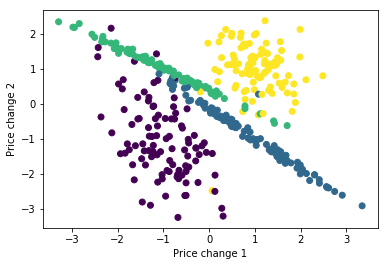

In [2]:
filename = 'sample.npy'

data = np.load(filename)
X = data[:,:-1]
y = data[:,-1]

fig,ax = plt.subplots()
ax.set_xlabel('Price change 1')
ax.set_ylabel('Price change 2')
sc = ax.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [3]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#Splitting data into training and test set
mid_point = int(len(X_scaled)/2)
X_train, y_train = X_scaled[:mid_point,:], y[:mid_point]
X_test, y_test = X_scaled[mid_point:,:], y[mid_point:]

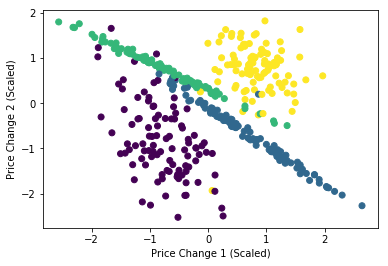

In [4]:
fig,ax2 = plt.subplots()
ax2.set_xlabel('Price Change 1 (Scaled)')
ax2.set_ylabel('Price Change 2 (Scaled)')
sc = ax2.scatter(X_scaled[:,0], X_scaled[:,1],c=y)

In [5]:
def create_grid(X, npts):

    """Create 2D of pair of input variables."""

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    return np.meshgrid(np.linspace(x_min, x_max, num=npts),
                         np.linspace(y_min, y_max, num=npts))


def colormap_scatter_plot(raw_input, scaled_input, targets, fit, axis_lx, axis_ly):

    """Plot color map of fit and scatter of data"""

    # Create color maps
    cmap_l = 'Pastel2'
    cmap_b = 'Dark2'

    # Create grid of scaled variables to predict labels.

    xx_scaled, yy_scaled = create_grid(scaled_input, 50)

    Z = fit.predict(np.c_[xx_scaled.ravel(), yy_scaled.ravel()])

    Z = Z.reshape(xx_scaled.shape)

    # Create grid for plotting.

    xx, yy = create_grid(raw_input, 50)

    fig, ax = plt.subplots()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_l)

    # Plot also the training points
    plt.scatter(raw_input[:, 0], raw_input[:, 1], c=targets, cmap=cmap_b, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax.set_xlabel(axis_lx)
    ax.set_ylabel(axis_ly)
    plt.show()


In [6]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [7]:
pred_train = gbc.predict(X_train)
pred_test = gbc.predict(X_test)

In [8]:
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_test,y_test))

1.0
0.875


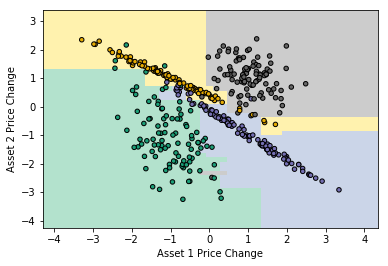

In [9]:
colormap_scatter_plot(X, X_train, y, gbc, 'Asset 1 Price Change', 'Asset 2 Price Change')

In [10]:
param_grid = {
    'learning_rate':[0.1,0.05,0.02,0.01],
    'max_depth':[4,6,8],
    'min_samples_leaf':[20, 50, 100, 150]
}

gbc = GradientBoostingClassifier()

clf = RandomizedSearchCV(
    gbc,
    param_grid,
    cv=5,
    n_jobs=4,
    n_iter=25)

clf.fit(X_train,y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print("Best params: ",clf.best_params_)
print("Train score",accuracy_score(pred_train,y_train))
print("Test score",accuracy_score(pred_test,y_test))

Best params:  {'min_samples_leaf': 20, 'max_depth': 4, 'learning_rate': 0.1}
Train score 1.0
Test score 0.89
